In [16]:
import csv
import json
import pandas as pd
import nltk

In [2]:
file1 = [json.loads(line) for line in open('16119_webhose_2020_01_db21c91a1ab47385bb13773ed8238c31_0000002.json', 'r')]
file2 = [json.loads(line) for line in open('16119_webhose_2020_02_db21c91a1ab47385bb13773ed8238c31_0000002.json', 'r')] 

In [3]:
data_to_file = open('covid19.csv', 'w', newline='')
csv_writer = csv.writer(data_to_file)
csv_writer.writerow(["facebook","title","published","replies_count", "author", "url", "country", "text"]);

In [4]:
for i in range(0, len(file1)):
        data = data1[i]
        facebook = data['thread']['social']['facebook']
        title = data['title']
        published = data['thread']['published']
        replies_count = data['thread']['replies_count']
        author = data['author']
        url = data['url']
        country = data['thread']['country']
        text = data['text']
        csv_writer.writerow([facebook,title,published,replies_count,author,url,country,text])
for i in range(0, len(file2)):
        data = data2[i]
        facebook = data['thread']['social']['facebook']
        title = data['title']
        published = data['thread']['published']
        replies_count = data['thread']['replies_count']
        author = data['author']
        url = data['url']
        country = data['thread']['country']
        text = data['text']
        csv_writer.writerow([facebook,title,published,replies_count,author,url,country,text])
data_to_file.close()


In [17]:
get_text = open("covid19.csv", 'r')
df = pd.read_csv("covid19.csv")
columns = df.text
print(len(columns))

106017


In [6]:
#tokenization
df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
print(df['tokenized'])

0         [Bengaluru, :, Isolation, wards, in, hospitals...
1         [The, government, making, sure, that, the, new...
2         [Apart, from, more, people, falling, sick, (, ...
3         [Asian, stock, markets, are, mostly, higher, o...
4         [Cash, flow, was, also, “, very, strong, ,, ”,...
                                ...                        
106012    [Corona, virus, is, the, most, effective, weap...
106013    [Hope, they, do, n't, bring, coronavirus, to, ...
106014    [Wall, Street, Ends, In, The, Red, As, Virus, ...
106015    [Since, mid-January, ,, the, name, on, the, li...
106016    [PH, shares, fall, back, to, 7,200, amid, ling...
Name: tokenized, Length: 106017, dtype: object


In [7]:
#tolowercase
df['lower_case_words'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
print(df['lower_case_words'])

0         [bengaluru, :, isolation, wards, in, hospitals...
1         [the, government, making, sure, that, the, new...
2         [apart, from, more, people, falling, sick, (, ...
3         [asian, stock, markets, are, mostly, higher, o...
4         [cash, flow, was, also, “, very, strong, ,, ”,...
                                ...                        
106012    [corona, virus, is, the, most, effective, weap...
106013    [hope, they, do, n't, bring, coronavirus, to, ...
106014    [wall, street, ends, in, the, red, as, virus, ...
106015    [since, mid-january, ,, the, name, on, the, li...
106016    [ph, shares, fall, back, to, 7,200, amid, ling...
Name: lower_case_words, Length: 106017, dtype: object


In [8]:
#remove_punctuation,numeric
df['is_alpha'] = df['lower_case_words'].apply(lambda x: [word for word in x if word.isalpha()])
print(df['is_alpha'])

0         [bengaluru, isolation, wards, in, hospitals, a...
1         [the, government, making, sure, that, the, new...
2         [apart, from, more, people, falling, sick, as,...
3         [asian, stock, markets, are, mostly, higher, o...
4         [cash, flow, was, also, very, strong, at, more...
                                ...                        
106012    [corona, virus, is, the, most, effective, weap...
106013    [hope, they, do, bring, coronavirus, to, these...
106014    [wall, street, ends, in, the, red, as, virus, ...
106015    [since, the, name, on, the, lips, of, increasi...
106016    [ph, shares, fall, back, to, amid, lingering, ...
Name: is_alpha, Length: 106017, dtype: object


In [9]:
#Stopwords
stop_words = nltk.corpus.stopwords.words('english')
df['stopwords_removed'] = df['is_alpha'].apply(lambda x: [word for word in x if word not in stop_words])

In [10]:
print(df['stopwords_removed'])

0         [bengaluru, isolation, wards, hospitals, acros...
1         [government, making, sure, new, coronavirus, m...
2         [apart, people, falling, sick, bad, fundamenta...
3         [asian, stock, markets, mostly, higher, friday...
4         [cash, flow, also, strong, us, billion, fourth...
                                ...                        
106012    [corona, virus, effective, weapon, created, xi...
106013    [hope, bring, coronavirus, poor, cambodian, pe...
106014    [wall, street, ends, red, virus, fears, spook,...
106015    [since, name, lips, increasing, numbers, tv, n...
106016    [ph, shares, fall, back, amid, lingering, jitt...
Name: stopwords_removed, Length: 106017, dtype: object


In [11]:
#convertingtolist
stoptext = df['stopwords_removed'].tolist()
stopped_text=[]
[stopped_text.extend(i) for i in stoptext]
len(stopped_text)

31047932

In [12]:
#lemmetaziation 
lemmetizer = nltk.WordNetLemmatizer()
lemmatized_words = [lemmetizer.lemmatize(t) for t in stopped_text]
lemmatized_words[:30]

['bengaluru',
 'isolation',
 'ward',
 'hospital',
 'across',
 'karnataka',
 'helpline',
 'take',
 'call',
 'query',
 'ready',
 'prevent',
 'spread',
 'virus',
 'first',
 'case',
 'india',
 'reported',
 'kerala',
 'yesterday',
 'chief',
 'secretary',
 'state',
 'government',
 'thursday',
 'held',
 'meeting',
 'additional',
 'chief',
 'secretary']

In [13]:
# list the top 50 words by frequency
from nltk import FreqDist
fdist = FreqDist(lemmatized_words)
lemmetized_text_topKeys = fdist.most_common(50)

In [14]:
print(lemmetized_text_topKeys)

[('said', 341836), ('china', 320330), ('coronavirus', 296230), ('virus', 200704), ('people', 177961), ('health', 175488), ('new', 174300), ('case', 167723), ('outbreak', 142623), ('year', 120429), ('also', 120408), ('chinese', 114787), ('one', 96585), ('country', 94624), ('day', 91480), ('wuhan', 91011), ('world', 89887), ('company', 85632), ('would', 80589), ('week', 80187), ('time', 80187), ('market', 76452), ('government', 75976), ('first', 75636), ('two', 74386), ('say', 72486), ('last', 69719), ('spread', 68402), ('million', 68353), ('disease', 67784), ('confirmed', 67736), ('u', 66846), ('could', 66658), ('official', 65943), ('number', 64840), ('news', 64468), ('death', 63549), ('city', 63450), ('ship', 61488), ('text', 61401), ('global', 61195), ('reported', 60271), ('state', 60113), ('public', 60062), ('passenger', 59543), ('february', 57921), ('hospital', 57269), ('patient', 56497), ('including', 53353), ('may', 52876)]


In [15]:
#list the top 50 bigrams by frequencies
from nltk.collocations import *
bigram_measures_plot = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(lemmatized_words)skcw
finder.apply_freq_filter(5)
scored = finder.score_ngrams(bigram_measures_plot.raw_freq)
for bigramscore in scored[:50]:
    print(bigramscore)

(('coronavirus', 'outbreak'), 0.001467440730029942)
(('location', 'text'), 0.0014113983501381027)
(('hong', 'kong'), 0.0013410555008945522)
(('novel', 'coronavirus'), 0.0012370872237158984)
(('confirmed', 'case'), 0.0009699518795647968)
(('cruise', 'ship'), 0.000888368346078573)
(('public', 'health'), 0.0008444362735656597)
(('world', 'health'), 0.0008098445977013863)
(('new', 'coronavirus'), 0.0007389219997003343)
(('per', 'cent'), 0.0007223347435829221)
(('hubei', 'province'), 0.0007103210609969128)
(('health', 'organization'), 0.0006263219076877648)
(('mainland', 'china'), 0.0006245504531509538)
(('text', 'location'), 0.0006220060002708071)
(('united', 'state'), 0.0006088328201697943)
(('last', 'year'), 0.0005928253128098837)
(('new', 'case'), 0.0005921167309951593)
(('rating', 'green'), 0.0005652872468285488)
(('green', 'name'), 0.0005595219675178366)
(('threshold', 'type'), 0.0005537244799428187)
(('type', 'textpattern'), 0.0005537244799428187)
(('textpattern', 'score'), 0.0005456

In [16]:
# list the top 50 bigrams by their Mutual Information scores
finder2 = BigramCollocationFinder.from_words(lemmatized_words)
finder2.apply_freq_filter(5)
scored = finder2.score_ngrams(bigram_measures_plot.pmi)
for bigramscore in scored[:50]:
    print(bigramscore)

(('aline', 'oyamada'), 22.56606574782782)
(('andreo', 'calonzo'), 22.56606574782782)
(('artha', 'ardhana'), 22.56606574782782)
(('asaduddin', 'owaisi'), 22.56606574782782)
(('babulal', 'marandi'), 22.56606574782782)
(('bichigt', 'bulgan'), 22.56606574782782)
(('campeões', 'clássica'), 22.56606574782782)
(('celestino', 'gallares'), 22.56606574782782)
(('chiwuike', 'onyeanu'), 22.56606574782782)
(('clássica', 'franquia'), 22.56606574782782)
(('combizym', 'hirudoid'), 22.56606574782782)
(('diretoras', 'esnobadas'), 22.56606574782782)
(('ekstra', 'bladet'), 22.56606574782782)
(('embedvideo', 'pagetitle'), 22.56606574782782)
(('eren', 'sengezer'), 22.56606574782782)
(('ezzeldin', 'bahader'), 22.56606574782782)
(('filou', 'oostende'), 22.56606574782782)
(('foodgrain', 'prodution'), 22.56606574782782)
(('galtung', 'døsvig'), 22.56606574782782)
(('ghanti', 'bajao'), 22.56606574782782)
(('hatidze', 'muratova'), 22.56606574782782)
(('heikki', 'kovalainen'), 22.56606574782782)
(('intramuscularly'

In [18]:
#Plotting_graphs
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

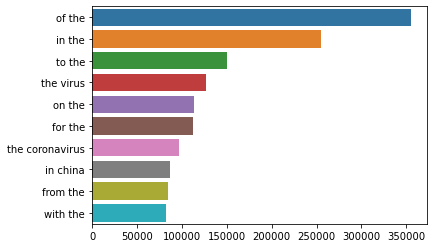

In [19]:
plot_top_ngrams_barchart(df['text'], 2)

In [31]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:10]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

In [32]:
df['country'] = df['country'].astype(str)


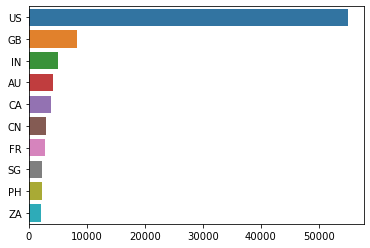

In [33]:
plot_top_non_stopwords_barchart(df['country'])